In [140]:
import pyodbc  
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [141]:
cnxn_str = ("Driver={SQL Server Native Client 11.0};"
            "Server=LAPTOP-X560UD;"
            "Database=冰水機資料_WP2020;"
            "Trusted_Connection=yes;")
cnxn = pyodbc.connect(cnxn_str)

In [142]:
sql_query = "SELECT timestamp, voltage  FROM [dbo].['total_Database$']"

In [143]:
sensor = 'voltage'

In [144]:
df = pd.read_sql_query(sql_query, cnxn)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152700 entries, 0 to 152699
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  152700 non-null  datetime64[ns]
 1   voltage    152700 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.3 MB


C:\Users\USER\AppData\Local\Temp/ipykernel_16380/118217830.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


[]

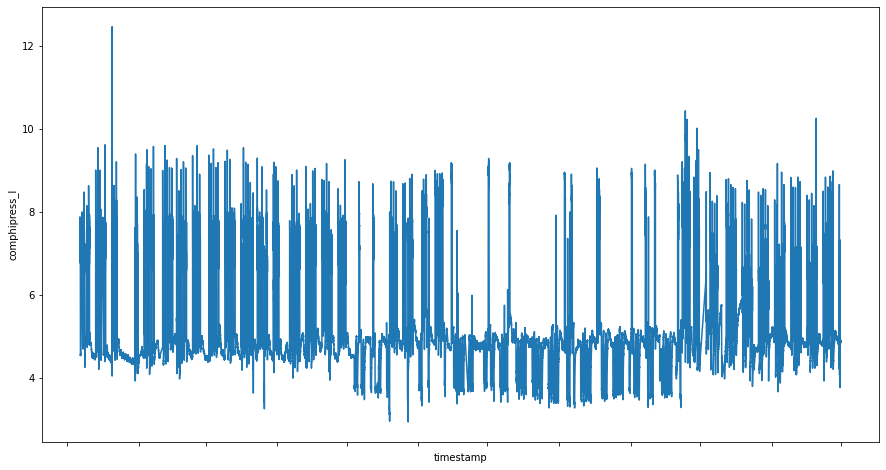

In [12]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(x="timestamp", y=sensor, data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.plot()

In [146]:
window = 50
k = 2

In [147]:
test = df.loc[:5000,:]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  5001 non-null   datetime64[ns]
 1   voltage    5001 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 78.3 KB


In [148]:
def dataPreparation(df):
    data = []
    for i, row in df.iterrows():
        init = i - (window - 1)
        end = i 
        if(init>=0):
            
            index = df.iloc[i]
            dataWindow = df.loc[init:end , :]
            n = index.to_numpy()
            data_row = [n[0], n[1], dataWindow[sensor].mean(), dataWindow[sensor].std()]
            data.append(data_row)
    
    return pd.DataFrame(data, columns = ['timestamp','sensor','moving_avg', 'stddev'])


In [149]:
process_d = dataPreparation(test)
process_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4952 entries, 0 to 4951
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   4952 non-null   datetime64[ns]
 1   sensor      4952 non-null   float64       
 2   moving_avg  4952 non-null   float64       
 3   stddev      4952 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 154.9 KB


#### lowerBB(lower Bollinger Band) = avg - (k * stddev),
#### upperBB(upper Bollinger Band) = avg + (k* stddev) 

In [150]:
process_d['upperBB'] = process_d['moving_avg'] + k * process_d['stddev']
process_d['lowerBB'] = process_d['moving_avg'] - k * process_d['stddev']
process_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4952 entries, 0 to 4951
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   4952 non-null   datetime64[ns]
 1   sensor      4952 non-null   float64       
 2   moving_avg  4952 non-null   float64       
 3   stddev      4952 non-null   float64       
 4   upperBB     4952 non-null   float64       
 5   lowerBB     4952 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 232.2 KB


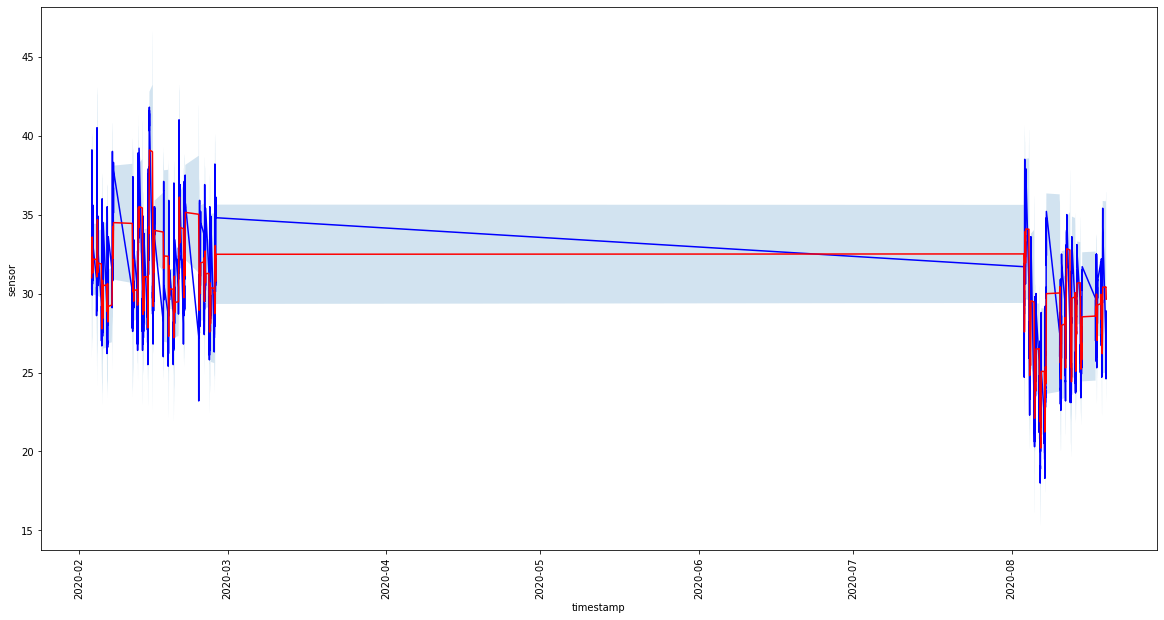

In [151]:
plt.figure(figsize=[20,10])
ax = sns.lineplot(x="timestamp", y="sensor", data=process_d, color='blue')
sns.lineplot(x="timestamp", y="moving_avg", data=process_d, color='red')
ax.fill_between(process_d.timestamp, process_d.lowerBB, process_d.upperBB, alpha=0.2)
plt.xticks(rotation = 90)
plt.show()

In [186]:
import pyodbc  
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [187]:
import csv

In [188]:
file = open('TS_30-08-2017.csv')

In [189]:
csvreader = csv.reader(file, delimiter=',')

In [190]:
data = []
for i in csvreader:
    for j in i:
        data.append(float(j))

In [191]:
df =  pd.DataFrame({'temperature':data})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7548 entries, 0 to 7547
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7548 non-null   float64
dtypes: float64(1)
memory usage: 59.1 KB


In [192]:
df

,temperature
0,15.24
1,15.64
2,15.78
3,15.46
4,15.54
...,...
7543,14.88
7544,14.78
7545,15.02
7546,14.72


In [195]:
sensor = 'temperature'

In [196]:
def dataPreparation(df, k=2, window=20):
    data = []
    for i, row in df.iterrows():
        
        init = i - (window - 1)
        end = i 
        if(init>=0):
            
            index = df.iloc[i]
            dataWindow = df.loc[init:end , :]
            n = index.to_numpy()

            data_row = [n[0], dataWindow[sensor].mean(), dataWindow[sensor].std()]
            data.append(data_row)
            
  
    ndf = pd.DataFrame(data, columns = [f'{sensor}','moving_avg', 'stddev'])
    ndf['upperBB'] = ndf['moving_avg'] + k * ndf['stddev']
    ndf['lowerBB'] = ndf['moving_avg'] - k * ndf['stddev']
    return ndf



In [197]:
def dataPreparation_Plot(df, k=2, window=20, samples = 300):
    data = []
    for i, row in df.iterrows():
        
        init = i - (window - 1)
        end = i 
        if(init>=0):
            
            index = df.iloc[i]
            dataWindow = df.loc[init:end , :]
            n = index.to_numpy()

            data_row = [n[0], dataWindow[sensor].mean(), dataWindow[sensor].std()]
            data.append(data_row)
    
    ndf = pd.DataFrame(data, columns = [f'{sensor}','moving_avg', 'stddev'])
    ndf['upperBB'] = ndf['moving_avg'] + k * ndf['stddev']
    ndf['lowerBB'] = ndf['moving_avg'] - k * ndf['stddev']
    
    df = ndf
    df = df.loc[:samples , :]
    plt.figure(figsize=[20,10])
    ax = sns.lineplot(x=df.index, y="temperature", data=df, color='blue')
    sns.lineplot(x=df.index, y="moving_avg", data=df, color='red').set(title=f'Bollinger Band from {window} prev data')
    ax.fill_between(df.index, df.lowerBB, df.upperBB, alpha=0.2)
    plt.xticks(rotation = 90)
    plt.show()

In [156]:
process_50 = dataPreparation(df, window = 50)
process_20 = dataPreparation(df)
process_10 = dataPreparation(df, window = 10)
process_200 = dataPreparation(df, window = 200)

In [157]:
process_50.info()
process_50.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7499 entries, 0 to 7498
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7499 non-null   float64
 1   moving_avg   7499 non-null   float64
 2   stddev       7499 non-null   float64
 3   upperBB      7499 non-null   float64
 4   lowerBB      7499 non-null   float64
dtypes: float64(5)
memory usage: 293.1 KB


,temperature,moving_avg,stddev,upperBB,lowerBB
0,15.41,15.5910,0.245866,16.082732,15.099268
1,15.38,15.5938,0.242562,16.078924,15.108676
2,14.84,15.5778,0.264816,16.107433,15.048167
3,14.82,15.5586,0.283966,16.126532,14.990668
4,15.20,15.5534,0.288158,16.129716,14.977084


In [174]:
def plotData(df, samples = 250):
    df = df.loc[:samples , :]
    plt.figure(figsize=[20,10])
    ax = sns.lineplot(x=df.index, y="temperature", data=df, color='blue')
    sns.lineplot(x=df.index, y="moving_avg", data=df, color='red')
    ax.fill_between(df.index, df.lowerBB, df.upperBB, alpha=0.2)
    plt.xticks(rotation = 90)
    plt.show()
    

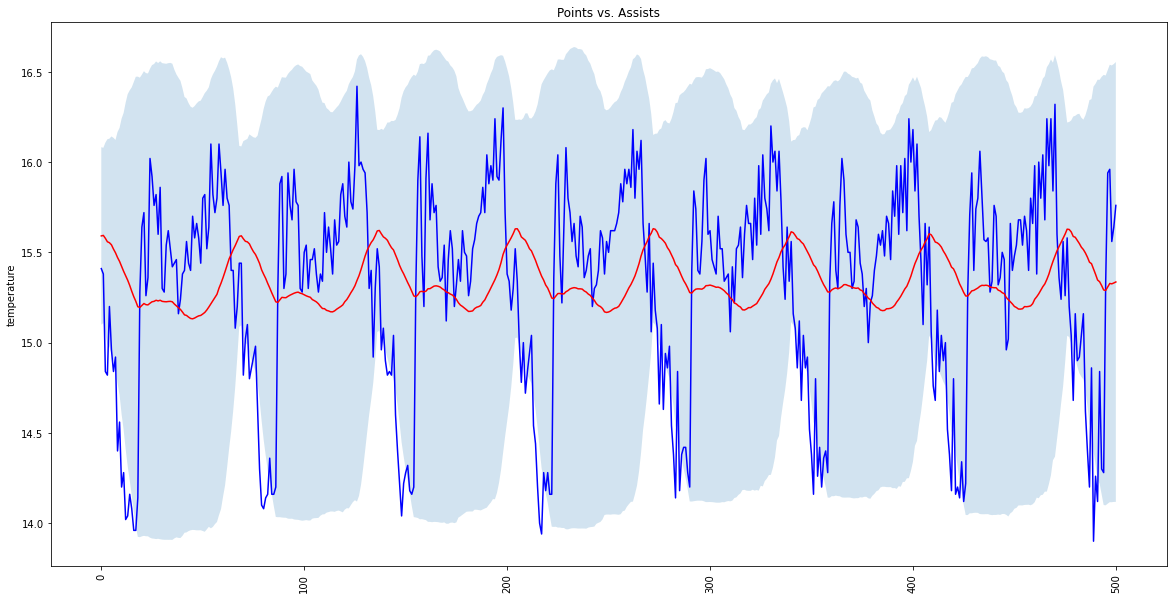

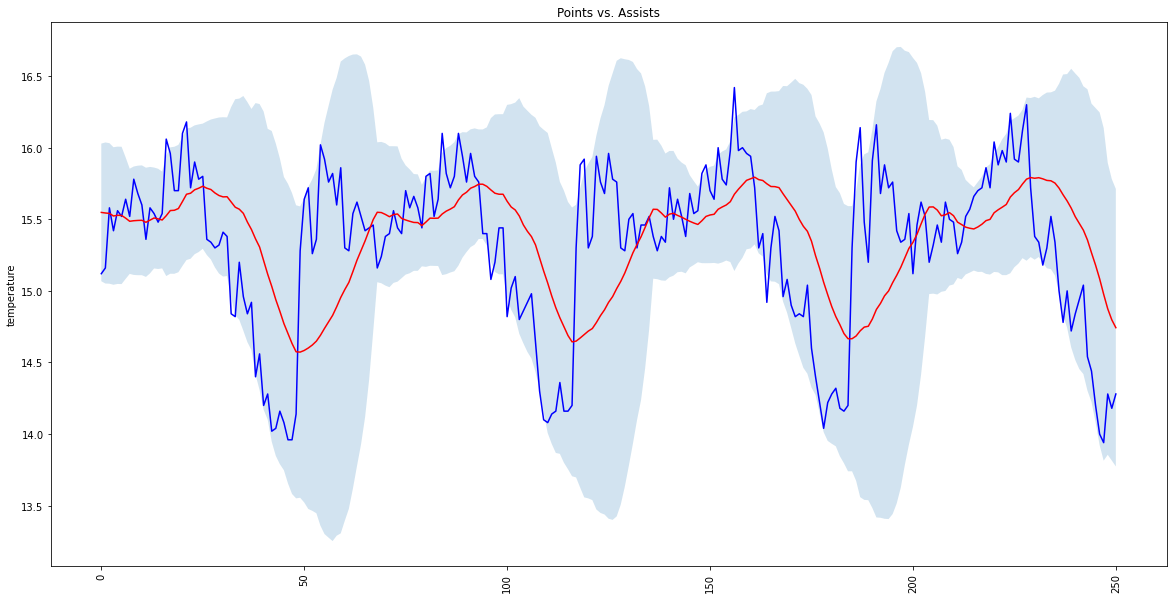

In [175]:
plotData(process_50, samples = 500)
plotData(process_20)


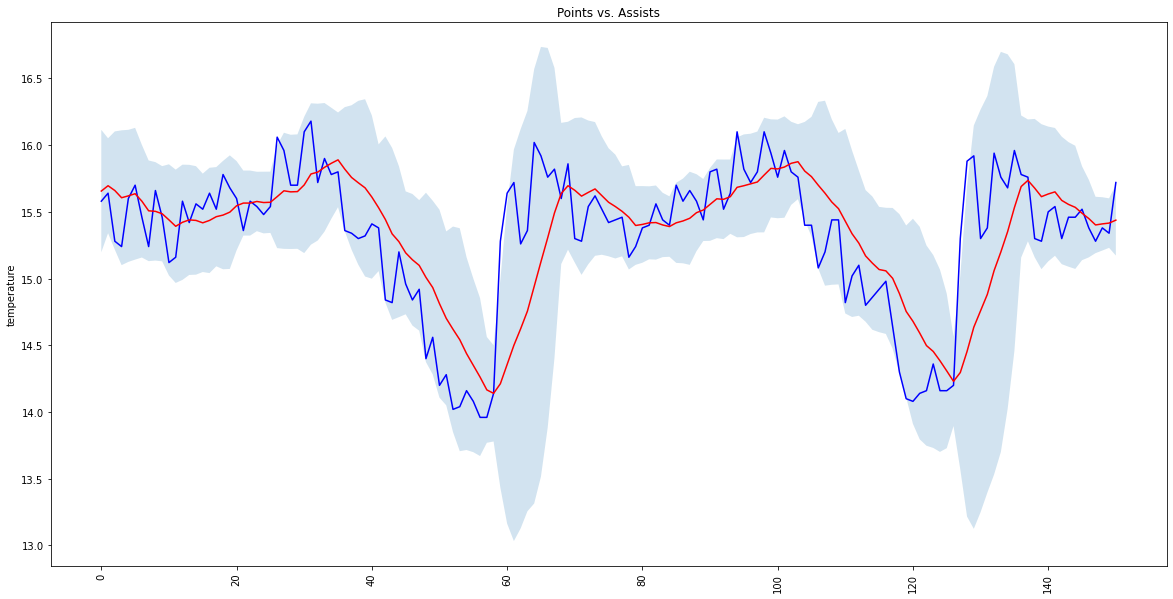

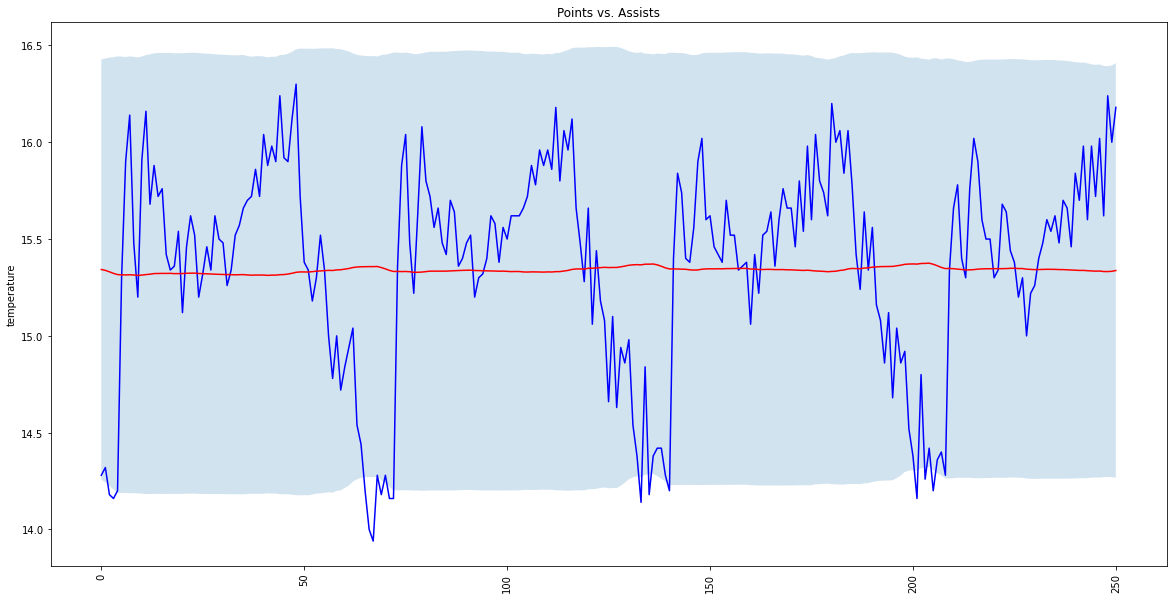

In [212]:
plotData(process_10, samples = 150)
plotData(process_200)

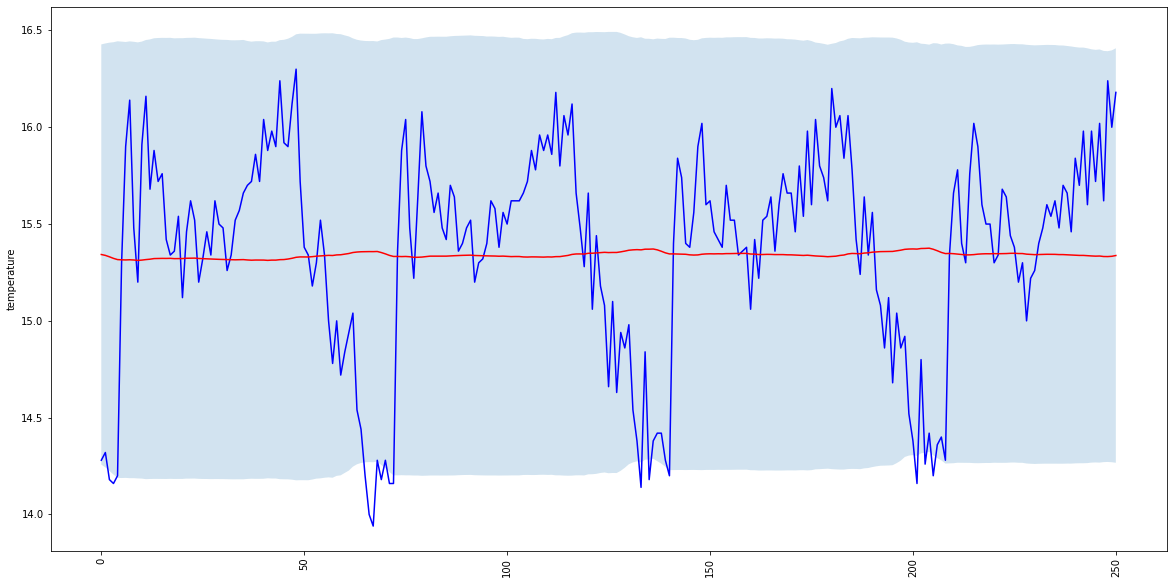

In [144]:
process_d = process_d.loc[:250 , :]
plt.figure(figsize=[20,10])
ax = sns.lineplot(x=process_d.index, y="temperature", data=process_d, color='blue')
sns.lineplot(x=process_d.index, y="moving_avg", data=process_d, color='red')
ax.fill_between(process_d.index, process_d.lowerBB, process_d.upperBB, alpha=0.2)
plt.xticks(rotation = 90)
plt.show()

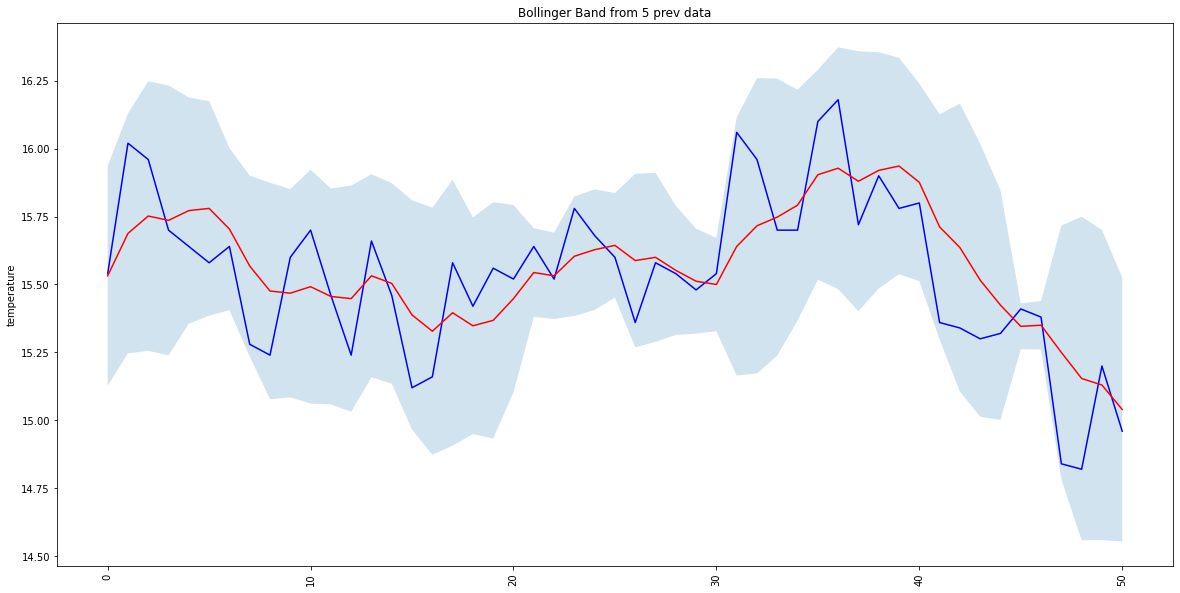

In [210]:
dataPreparation_Plot(df, k=2, window=5, samples = 50)

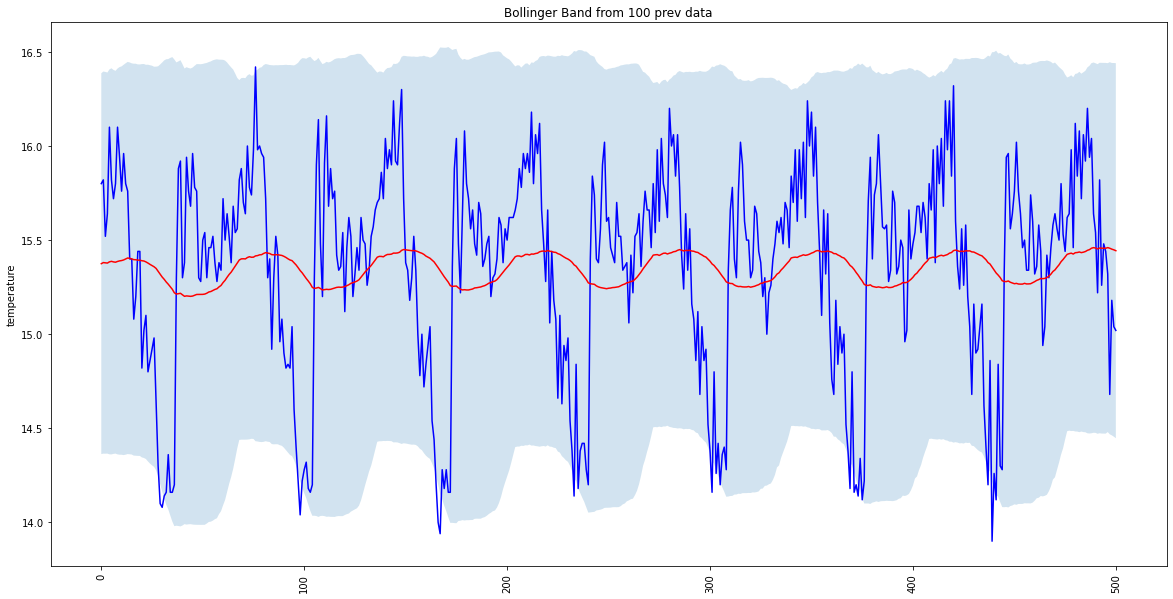

In [202]:
dataPreparation_Plot(df, k= 2, window=100, samples = 500)